<div style="border:solid green 4px; padding: 20px">Hello! My critical comments are highlighted with <span style='color: red;'>red</span>,  less urgent remarks are in <span style='color: #ebd731;'>yellow</span>, recommendations and extra information - in <span style='color: green;'>green</span>.</div>

In [1]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import warnings
warnings.filterwarnings("ignore")

### Step 1: Study General Information

In [8]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
df.to_csv(r'C:\Users\libby\Downloads\Practicum.csv', index=False)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are missing values at Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating
Year_of_Release Should be transferred to int

In [6]:
df.duplicated().sum()

0

There are no duplicates

<div style="border:solid green 4px; padding: 20px">Done!</div>

### Step 2: Prepare the data

In [7]:
df.columns = map(str.lower, df.columns)

No duplicates in this data

In [8]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


These rows are useless since they contain no information about genre and ratings and are a small portion of the dataset so I will drop them and this will also leave me with mo Genre NaNs

In [9]:
df = df.dropna(subset=['name'])

Moving on with handeling missing data

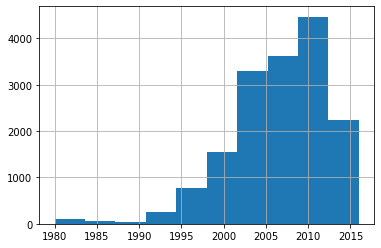

In [10]:
df['year_of_release'].hist()

The year of release is not normally distributed. I will try to see if there anything in common between the rows where the year of release is missing

In [11]:
df[df['year_of_release'].isnull()]['genre'].value_counts()

Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Strategy        10
Adventure       10
Platform        10
Name: genre, dtype: int64

In [12]:
df[df['year_of_release'].isnull()]['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

In [13]:
df[df['platform']=='17']['year_of_release'].value_counts()

Series([], Name: year_of_release, dtype: int64)

The genre data for rows with a missing year is variable and there is no data for "17" platform so I will do the obvious and fill the NaNs with the median year of release

In [14]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div style="border:solid green 4px; padding: 20px">.</div>

Around half of the data lacks critic score, user_score, and Rating. Besides, the data type of User_Score and  Rating is object meaning that there are words instead of numbers lets look at this closer

In [15]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [17]:
df['critic_score'].median()

71.0

In [18]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.5       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [19]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Rating, User score and critic category missing values come together, they don't have distinguished majority, Replacing them with mode/mean or median might cause bias in the data analysis so  I will replace it with -999 and will ignore them in Score Analysis

In [20]:
df['critic_score'] = df['critic_score'].fillna(-999)
df['user_score'] = df['user_score'].fillna(-999)
df['rating'] = df['rating'].fillna(-999)

<div style="border:solid green 4px; padding: 20px">Well, if you tend to ignore them, you could leave them as is (empty), then ignore nans.</div>

Now let's look at non-number values at User_Score, I can't know what was the intended method to fill them so I will treat them as NaNs

In [21]:
df['user_score'][df.user_score == 'tbd'] = -999

Now that the User_Score is numeric it is secure to change it to float

In [22]:
df['user_score'] = df['user_score'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Step 3: Analyze the data

<span style='color:Blue'> Look at how many games were released in different years. Is the data for every period significant?  </span>


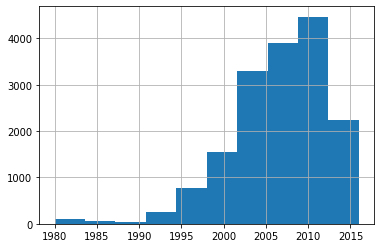

In [25]:
df['year_of_release'].hist()

Most of the games were released after 2000 so the data below 2000 is not significant

<span style='color:Blue'> Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.   </span>




In [26]:

piv1 = df.pivot_table(index=['platform'], values=['total_sales'],aggfunc='sum').sort_values('total_sales', ascending=False).head(10)
piv2 = piv1.reset_index()
top_platfotms = piv2['platform'].values.tolist()
top_platfotms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

The most popular platforms are :'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'. lets look at their popularity

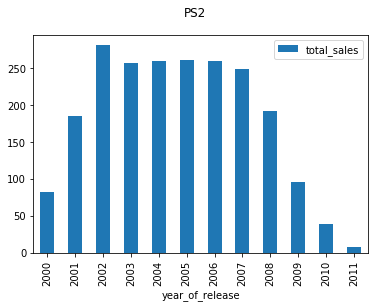

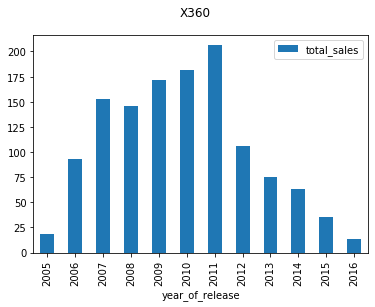

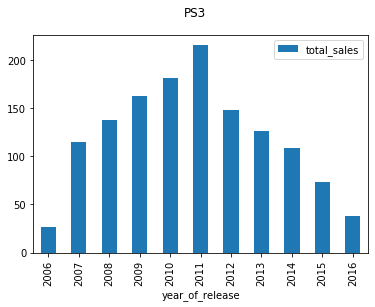

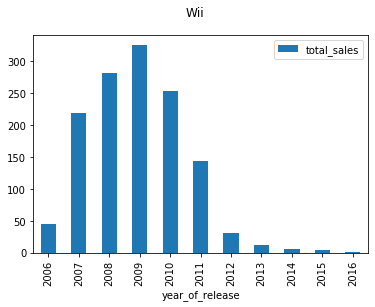

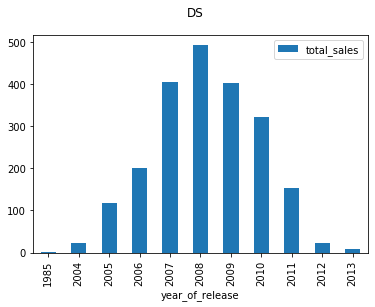

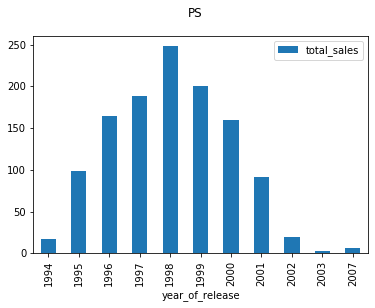

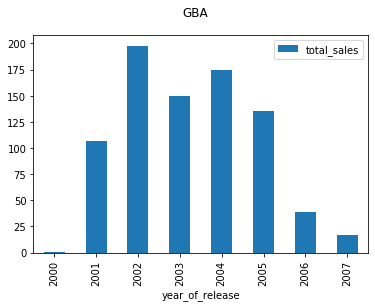

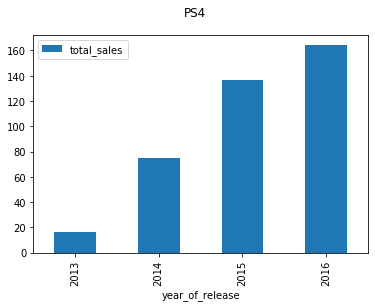

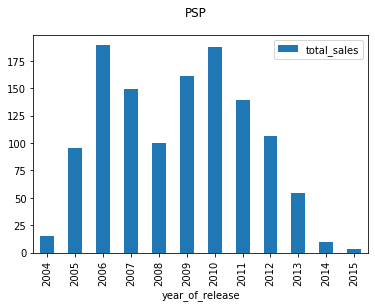

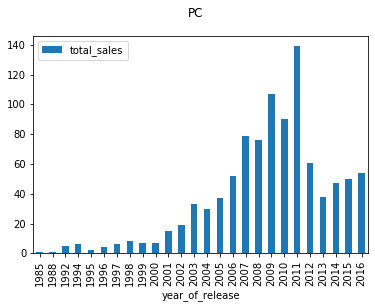

In [27]:
for i in top_platfotms:
    df[df['platform'] == i].pivot_table(index=['year_of_release'], values=['total_sales'],aggfunc='count').plot.bar()
    plt.suptitle(i)
    plt.show()
    

<div style="border:solid green 4px; padding: 20px">Good.</div>

In [28]:
relevant_platforms = [ 'X360', 'PS3', 'DS', 'PS4',  'PC']

<span style='color:Blue'>Find platforms that used to be popular but now have zero sales. </span>

The platforms that were popular and now have zero sales are: PS2, DS, PS, GBA and PSP

PS2 platform last games were released in 2011, and DS last games were released in 2013 meaning they lost popularity, the Wii platform had very few releases from 2013 and on meaning it is also fading, the PSP platform is also on its way out of the market. The X360 and PS3 platforms continue to be active since they both have at least 10 released games in 2016. The PS4 is the only platform that gains popularity since its sales grow every year!

<span style='color:Blue'> How long does it generally take for new platforms to appear and old ones to fade?  </span>


It usualy takes 5 years.

<span style='color:Blue'>Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017 </span>


I belive that 5 years is the perioud we should look at

<span style='color:Blue'> Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.  </span>
       

The PS4 platform is Growing, PC shows slow and minor recovery. X360, PS3, and Wii are shrinking. The most potential profitable platform is PS4, PC might be a candidate for investment


<span style='color:Blue'> Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.  </span>



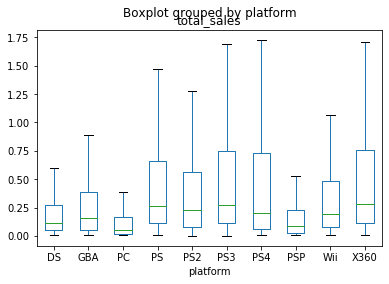

In [29]:
df.loc[df['platform'].isin(top_platfotms)].boxplot(by ='platform', column =['total_sales'], grid = False,showfliers=False)
plt.show()

<div style="border:solid green 4px; padding: 20px">That's it!</div>

The average sales seem similar between the platforms, I can't tell if there are significant differences without performing statistical analysis.

<span style='color:Blue'> Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.  </span>

<span style='color:Blue'> Keeping your conclusions in mind, compare the sales of the same games on other platforms  </span>




The corelation coeficientbetween platform X360 and critics scoreis: 0.3937358653072588
The corelation coeficientbetween platform PS3 and critics scoreis: 0.4324315685642061
The corelation coeficientbetween platform DS and critics scoreis: 0.23637945738859747
The corelation coeficientbetween platform PS4 and critics scoreis: 0.40656790206178095
The corelation coeficientbetween platform PC and critics scoreis: 0.2568867378948215


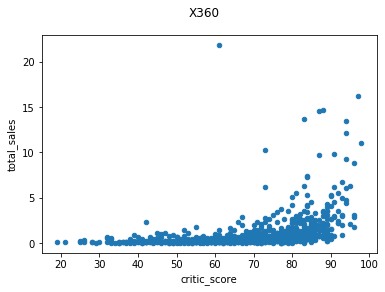

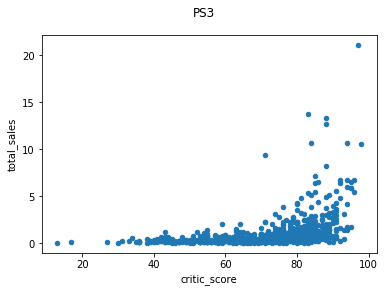

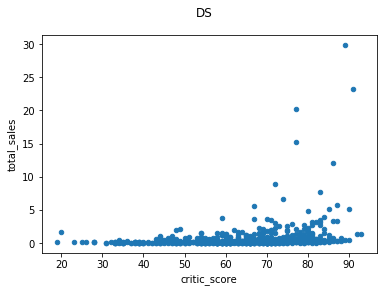

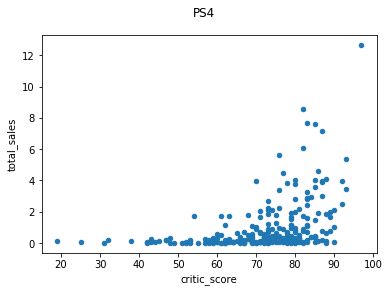

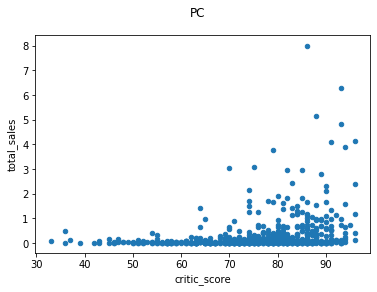

In [30]:
df[df['platform'] == i]

for i in relevant_platforms:
    df[(df['platform'] == i) & (df['critic_score'] != -999)].plot(x="critic_score", y="total_sales", kind="scatter")
    plt.suptitle(i)
    corr1 = df[(df['platform'] == i) & (df['critic_score'] != -999)]['critic_score'].corr(df[(df['platform'] == i) & (df['critic_score'] != -999)]['total_sales'])
    print("The corelation coeficientbetween platform {} and critics scoreis: {}".format(i, corr1))
   

There is weak or no correlation between the critic scoe and the sales since  for some games we have high mean score but low sales. The corelation spans between 0.4 and 0.23


<span style='color:Blue'> Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?  </span>




In [31]:
df.pivot_table(index=['genre'], values=['total_sales'],aggfunc='sum').sort_values('total_sales', ascending=False).head(3)

,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45


In [32]:
df.pivot_table(index=['genre'], values=['total_sales'],aggfunc='sum').sort_values('total_sales').head(3)

,total_sales
genre,
Strategy,174.23
Adventure,237.59
Puzzle,242.57


The most popular genres are quick and active and the least popular ones are slow and require thinking.

### Step 4. Create a user profile for each region

In [33]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-999.0,-999,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-999.0,-999,31.38



<span style='color:Blue'> For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. Explain the difference.

Do ESRB ratings affect sales in individual regions?rms  </span>




[Text(0, 0, 'DS'),
 Text(0, 0, 'PS2'),
 Text(0, 0, 'PS3'),
 Text(0, 0, 'Wii'),
 Text(0, 0, 'X360')]

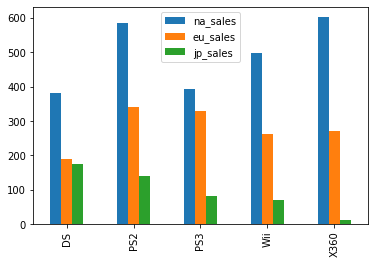

In [77]:
top_platformss = ['DS','PS2','PS3', 'Wii','X360']

df1 = df.loc[df['platform'].isin(top_platformss)].pivot_table(index=['platform'], values=['na_sales'],aggfunc='sum').reset_index()

df2 = df.loc[df['platform'].isin(top_platformss)].pivot_table(index=['platform'], values=['eu_sales'],aggfunc='sum').reset_index()

df3 = df.loc[df['platform'].isin(top_platformss)].pivot_table(index=['platform'], values=['jp_sales'],aggfunc='sum').reset_index()

merged = pd.merge(df1,df2,on='platform')
merged = pd.merge(merged,df3,on='platform')
ax = merged.plot.bar()
ax.set_xticklabels(top_platformss)

In NA and EU The popularity of the top 5 platforms is similar while in JP there is a big difference between the platform sales, DS PS2 and PS3 are popular in NA AU and JP while Wii and X360 are popular only in NA and EU

<div style="border:solid #ebd731; 4px; padding: 20px">I also would like to see platforms colored the same way, so we can compare the position of a platform between regions. Or any other way you think of, like placing it all into one plot. Perhaps something like <a href="">this</a> (but, preferably with horizontal orientation) would work well.<br><hr><b>upd. </b>Very good.</div>

[Text(0, 0, 'Action'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Sports')]

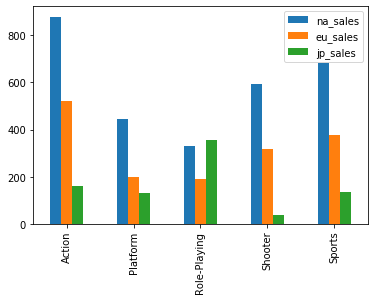

In [75]:
top_genres = ['Action','Platform','Role-Playing','Shooter','Sports']

df1 = df.loc[df['genre'].isin(top_genres)].pivot_table(index=['genre'], values=['na_sales'],aggfunc='sum').reset_index()

df2 =df.loc[df['genre'].isin(top_genres)].pivot_table(index=['genre'], values=['eu_sales'],aggfunc='sum').reset_index()

df3 = df.loc[df['genre'].isin(top_genres)].pivot_table(index=['genre'], values=['jp_sales'],aggfunc='sum').reset_index()

merged = pd.merge(df1,df2,on='genre')
merged = pd.merge(merged,df3,on='genre')
ax = merged.plot.bar()
ax.set_xticklabels(top_genres)


The most popular genres in NA and EU are Sports and actions while in JP it is Role-Playing.

<div style="border:solid #ebd731; 4px; padding: 20px">Same here.<br><hr><b>upd. </b>Ok.</div>

[Text(0, 0, 'AO'),
 Text(0, 0, 'E'),
 Text(0, 0, 'E10+'),
 Text(0, 0, 'EC'),
 Text(0, 0, 'K-A'),
 Text(0, 0, 'M'),
 Text(0, 0, 'RP'),
 Text(0, 0, 'T')]

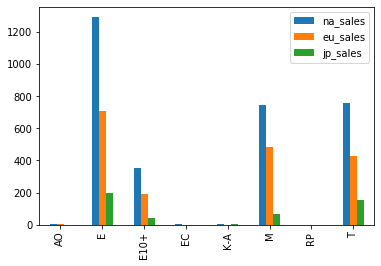

In [82]:
ratings= ['AO','E','E10+','EC','K-A','M','RP','T']
df1 = df[df.rating != -999].pivot_table(index=['rating'], values=['na_sales'],aggfunc='sum').reset_index()


df2 = df[df.rating != -999].pivot_table(index=['rating'], values=['eu_sales'],aggfunc='sum').reset_index()


df3 = df[df.rating != -999].pivot_table(index=['rating'], values=['jp_sales'],aggfunc='sum').reset_index()

merged = pd.merge(df1,df2,on='rating')
merged = pd.merge(merged,df3,on='rating')
ax = merged.plot.bar()
ax.set_xticklabels(ratings)


The ratings effect the sales in all 3 regions, The ratings that have the best sellings are E, M and T

### Step 5. Test the following hypotheses:

<span style='color:Blue'> —Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What criteria you used to test the hypotheses, and why

In [45]:
def check_significance_ttest(sample_1,sample_2):
    alpha = .05
    results = st.ttest_ind(
        sample_1, 
        sample_2)

    print('p-value: ', results.pvalue) 

In [41]:
category_platform = {'Wii':'Wii','NES':'Nintendo','GB':'Game Boy','DS':'Nintendo','X360':'Xbox','PS3':'PS','PS2':'PS','SNES':'Nintendo','GBA':'Game Boy'
                                ,'PS4':'PS','3DS':'Nintendo','N64':'Nintendo','PS':'PS','XB':'Xbox','PC':'PC','2600':'Atari','PSP':'PS','XOne':'Xbox'
                                ,'WiiU':'Wii','GC':'Nintendo','GEN':'Other','DC':'DC','PSV':'SP','SAT':'SAT','SCD':'PC','WS':'Box Game','NG':'Nintendo'
                                ,'TG16':'PC','3DO':'Other','GG':'Other','PCFX':'PC'}

In [42]:
pc_platforms = ['PC','PCFX','TG16']
Xbox_platforms = ['X360','XOne','XB']

In [43]:
print("The null hypothesis is that Average user ratings of the Xbox One and PC platforms are the same")
sample_1 = df.loc[(df['platform'].isin(pc_platforms)) & (df['user_score'] != -999)]['user_score']
sample_2 = df.loc[(df['platform'].isin(Xbox_platforms)) & (df['user_score'] != -999)]['user_score']
check_significance_ttest(sample_1,sample_2)

The null hypothesis is that Average user ratings of the Xbox One and PC platforms are the same
p-value:  0.06834782750654046


Since the P-value is bigger then 0.05 it means that the there is no significant difference between the user ratings of PC and Xbox platforms

In [44]:
print("The null hypothesis is : Average user ratings for the Action and Sports genres are different")
sample_3 = df.loc[(df.genre=='Sports') & (df['user_score'] != -999)]['user_score']
sample_4 = df.loc[(df.genre=='Action') & (df['user_score'] != -999)]['user_score']
check_significance_ttest(sample_3,sample_4)

The null hypothesis is : Average user ratings for the Action and Sports genres are different
p-value:  0.10406951359049141


Since the P-value is bigger then 0.05 it means that there is no significant difference between the user ratings of Sports and action genres

<div style="border:solid green 4px; padding: 20px">You have slightly unorthodox platform splitting. But your implementation seems absolutely right, good job.</div>

<div style="border:solid green 4px; padding: 20px">Overall, that is a good work. Fix those places I've marked. See you!</div>

### Step 6: General Conclusion

#### Data preprocesing
There were missing values in almost half of the data in the rating, user score, and critic score, I replaced them with -999 to use these rows in a further analysis that doesn't require these fields and ignored these rows when these cols were relevant to the data analysis. There were two rows with missing names and genre that I dropped.

#### Data analysis
*Most of the games were released after 2000 so the data below 2000 is not significant

*The PS2, DS, PS, GBA, and PSP were popular and now have zero sales. X360, Wii, and PS3 are shrinking. PC shows slow recovery and PS4 is growing and seems to be the best potential for investment

*It usually takes 5 years for a platform to gain or lose relevance

*The average sales seem similar between the platforms

*There is a positive correlation between critics score and sales in the popular platforms 

*The most popular genres are quick and active and the least popular ones are slow and require thinking. The most popular is action and the second most popular is sports. The least popular genre is Strategy.

#### Create a user profile for each region

*In NA and EU The popularity of the top 5 platforms is similar while in JP there is a big difference between the platform sales, DS PS2 and PS3 are popular in NA EU and JP while Wii and X360 are popular only in NA and EU

*The most popular genres in NA and EU are Sports and actions while in JP it is Role-Playing

*The ratings affect the sales in all 3 regions, The ratings that have the best sellings are E, M, and T


*The most popular genres are quick and active and the least popular ones are slow and require thinking. The most popular is action and the second most popular is Sports. The least popular genre is Strategy.

#### Test hypotheses
*There is no significant differense between the user ratings of PC and Xbox platforms.

*There is no significant differense between the user ratings of Sports and action genres.

<div style="border:solid green 4px; padding: 20px">So now we know that people like active games, that Japanese gamers have their own preferences and also that game critics opinions aren't always significant on future sales. Good job. Take care, see you!</div>